<a href="https://colab.research.google.com/github/minjun5470/webscraping/blob/main/CAPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.CAPM(Capital Asset Pricing Model)

자산의 기대수익률에 대한 이론

$$E[R_p]=R_f +\beta(E[R_m]-R_f)$$

- $E[R_p]$ :포트폴리오 기대수익률
- $E[R_m]$ :시장 기대수익률(index 사용)
- $R_f$:무위험 수익률
- $\beta$:베타

$$\beta_p=\frac{Cov(R_p-R_f,R_m-R_f)}{var(R_m-R_f)}$$

- $\beta_p$에 대한 가장 간단한 Estimate : Linear Regression을 활용하는 것

$$ r_p =\alpha_P + \beta_P r_M+ \epsilon_P $$

- $r_p$ : 포트폴리오 초과 수익률
- $r_M$ : 시장 초과 수익률

$$ r_p =\beta_P r_M+ \epsilon_P $$

$$Var(r_p)=\beta^2_p \sigma^2_M+Var(\epsilon_p)$$

- $Cov(\epsilon_p,r_M)=0이므로, $

- $E[\epsilon_p]=0$
- $E[r_p]=\mu_p=\beta_p E[r_M]$

#1.1 import

In [1]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np #행렬 연산
import pandas as pd
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy as sp
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


- Market : KOSPI200(KS200)
- Individual Asset : 삼성전자(005930),오뚜기(007310),sk하이닉스(000660)
- 무위험자산(현금성자산) : KODEX 단기채권(153130), KOSEF단기자금(130730)


In [3]:
market=fdr.DataReader("KS200",start='2019-1-1',end='2019-12-31')[['Close']] #adf Close:수정된 종가기준으로 불러옴
se=fdr.DataReader("005930",start='2019-1-1',end='2019-12-31')[['Close']]
otg=fdr.DataReader("007310",start='2019-1-1',end='2019-12-31')[['Close']]
skh=fdr.DataReader("000660",start='2019-1-1',end='2019-12-31')[['Close']]
cash=fdr.DataReader("130730",start='2019-1-1',end='2019-12-31')[['Close']]

In [4]:
market_rtn=np.log(market / market.shift(1)).fillna(0)
market_rtn.columns=['market']
se_rtn=np.log(se / se.shift(1)).fillna(0)
se_rtn.columns=['se']
otg_rtn=np.log(otg / otg.shift(1)).fillna(0)
otg_rtn.columns=['otg']
skh_rtn=np.log(skh / skh.shift(1)).fillna(0)
skh_rtn.columns=['skh']
cash_rtn=np.log(cash / cash.shift(1)).fillna(0)
cash_rtn.columns=['cash']

rtns=[market_rtn,se_rtn,otg_rtn,skh_rtn,cash_rtn]

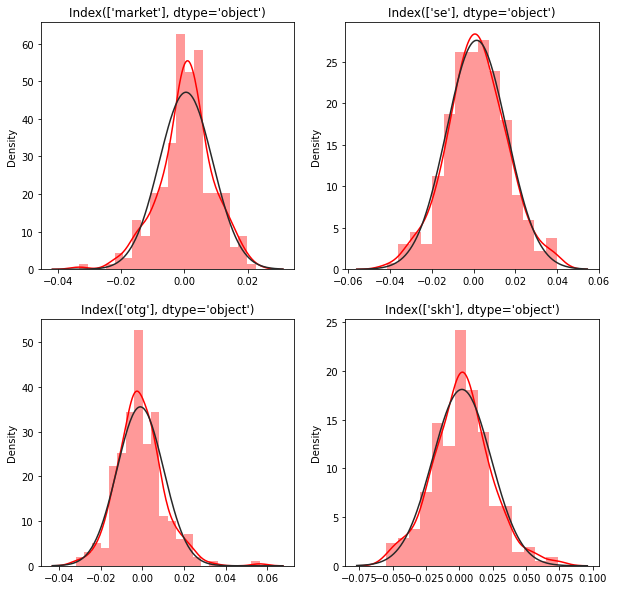

In [5]:
import warnings
warnings.simplefilter('ignore')

plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i+1) #plt.subplot(nrows,ncols,index) (0,0)(0,1)=>(1,0)(1,1)
    sns.distplot(rtns[i],color='red',fit=sp.stats.norm) #히스토그램
    plt.title(rtns[i].columns)
plt.show()


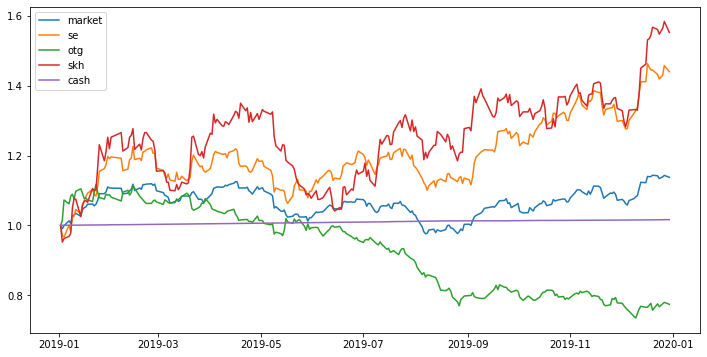

In [6]:
plt.figure(figsize=(12,6))
for rtn in rtns:
    plt.plot(np.exp(rtn.cumsum()),label=rtn.columns[0])
plt.legend()
plt.show()

In [7]:
rtn_df=pd.concat(rtns,axis=1) 

excess_market=rtn_df.market-rtn_df.cash
excess_market.name='excess market'
excess_se=rtn_df.se-rtn_df.cash
excess_se.name='excess se'
excess_otg=rtn_df.otg-rtn_df.cash
excess_otg.name='excess otg'
excess_skh=rtn_df.skh-rtn_df.cash
excess_skh.name='excess skh'

excess_rtn_df=pd.concat([cash_rtn,excess_market,excess_se,excess_otg,excess_skh],axis=1)
excess_rtn_df.head()

,cash,excess market,excess se,excess otg,excess skh
Date,,,,,
2019-01-02,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-03,0.000205,-0.009777,-0.030331,0.013665,-0.049243
2019-01-04,0.000102,0.008152,-0.004100,0.056137,0.010243
2019-01-07,0.000102,0.014066,0.034022,-0.010574,0.006735
2019-01-08,0.000051,-0.007419,-0.016968,0.020783,0.008431


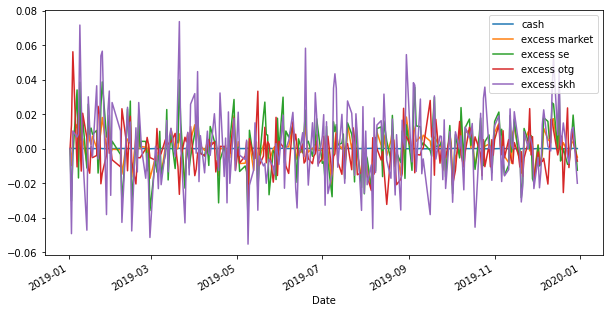

In [8]:
excess_rtn_df.plot(figsize=(10,5))

- Linear Regression
    - statsmodels
    - scipy
    - sklearn(scikit-learn)

In [9]:
#Linear Regression
X=sm.add_constant(excess_market) #상수항이 0이 아닌 회귀분석모형인 경우에는 상수항을 추가해준다

model_se=sm.OLS(excess_se,X)
result_se=model_se.fit()
print(result_se.summary()) #종속변수=>독립변수,otg의 R-squared가 0.038이기 때문에 설명을 거의하지 못함

                            OLS Regression Results                            
Dep. Variable:              excess se   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     709.1
Date:                Tue, 26 Jul 2022   Prob (F-statistic):           3.77e-74
Time:                        04:36:48   Log-Likelihood:                 860.56
No. Observations:                 246   AIC:                            -1717.
Df Residuals:                     244   BIC:                            -1710.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0007      0.000      1.581

In [10]:
model_otg=sm.OLS(excess_otg,X)
result_otg=model_otg.fit()
print(result_otg.summary())

                            OLS Regression Results                            
Dep. Variable:             excess otg   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     9.594
Date:                Tue, 26 Jul 2022   Prob (F-statistic):            0.00218
Time:                        04:36:48   Log-Likelihood:                 760.32
No. Observations:                 246   AIC:                            -1517.
Df Residuals:                     244   BIC:                            -1510.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0012      0.001     -1.739

In [11]:
model_skh=sm.OLS(excess_skh,X)
result_skh=model_skh.fit()
print(result_skh.summary())

                            OLS Regression Results                            
Dep. Variable:             excess skh   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     251.3
Date:                Tue, 26 Jul 2022   Prob (F-statistic):           2.21e-39
Time:                        04:36:48   Log-Likelihood:                 676.35
No. Observations:                 246   AIC:                            -1349.
Df Residuals:                     244   BIC:                            -1342.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0009      0.001      0.881

- const의 alpha가 0에 가깝기 때문에 무시할 수 있다(const의 coef)
$$ r_p =\beta_P r_M+ \epsilon_P $$

In [12]:
print(result_se.params)

const            0.000742
excess market    1.471250
dtype: float64


In [13]:
se_market_hat=excess_market*result_se.params['excess market']
se_resid_hat=excess_se-se_market_hat

otg_market_hat=excess_market*result_otg.params['excess market']
otg_resid_hat=excess_otg-otg_market_hat

skh_market_hat=excess_market*result_skh.params['excess market']
skh_resid_hat=excess_skh-skh_market_hat

$$E[R_p]=R_f +\beta(E[R_m]-R_f)$$

In [14]:
expected_market=excess_market.mean()*252
betas=np.array([0,1,result_se.params['excess market'],result_otg.params['excess market'],result_skh.params['excess market']])
expected_rf=cash_rtn.mean().cash*252

expected_rtn = expected_rf + betas * expected_market #array이기 때문에 betas를 이용해 *

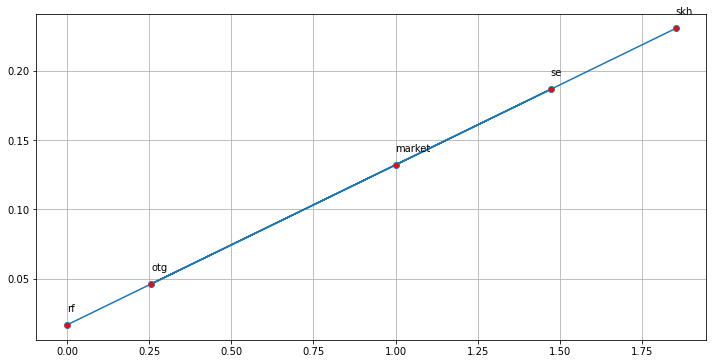

In [23]:
labels=['rf','market','se','otg','skh']

plt.figure(figsize=(12,6))
plt.plot(betas,expected_rtn,marker='o',mfc='red')
plt.grid(True)
for i,text in enumerate(labels):
    plt.annotate(labels[i],(betas[i],expected_rtn[i]+0.01))


$$Var(r_p)=\beta^2_p \sigma^2_M+Var(\epsilon_p)$$


In [28]:
market_risk= excess_market.std()
stock_risk= excess_rtn_df[['excess se','excess otg','excess skh']].std().values
resid_risk=np.sqrt(stock_risk **2 - (betas[2:]*market_risk)**2)
risk_result=pd.DataFrame({'beta':betas[2:],
                          'total risk':stock_risk,
                          'resid risk':resid_risk},
                         index=['se','otg','skh'])
risk_result

,beta,total risk,resid risk
se,1.471250,0.014497,0.007335
otg,0.257205,0.011239,0.011024
skh,1.851836,0.022097,0.015510


# Beta Hedging

In [29]:
model_bh=sm.OLS(excess_se - excess_market*result_otg.params['excess market'],sm.add_constant(excess_market))
result_bh= model_bh.fit()
result_bh.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     482.9
Date:                Tue, 26 Jul 2022   Prob (F-statistic):           9.11e-60
Time:                        05:44:05   Log-Likelihood:                 860.56
No. Observations:                 246   AIC:                            -1717.
Df Residuals:                     244   BIC:                            -1710.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0007      0.000      1.581      0.115      -0.000       0.002
excess market     1.2140      0.055     21.974      0.000       1.105       1.323
==============================================================================
Omnibus:                        8.218   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.235
Skew:                           0.381   Prob(JB):                       0.0163
Kurtosis:                       3.470   Cond. No.                         118.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""